In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
###Unique values

In [ ]:
for i in data.iloc[: , 5 : ].columns:
    print(f'{i} : {data[i].nunique()}')

Rating : 5
Recommended IND : 2
Positive Feedback Count : 82
Division Name : 3
Department Name : 6
Class Name : 20


EXPLORATORY DATA ANALYSIS

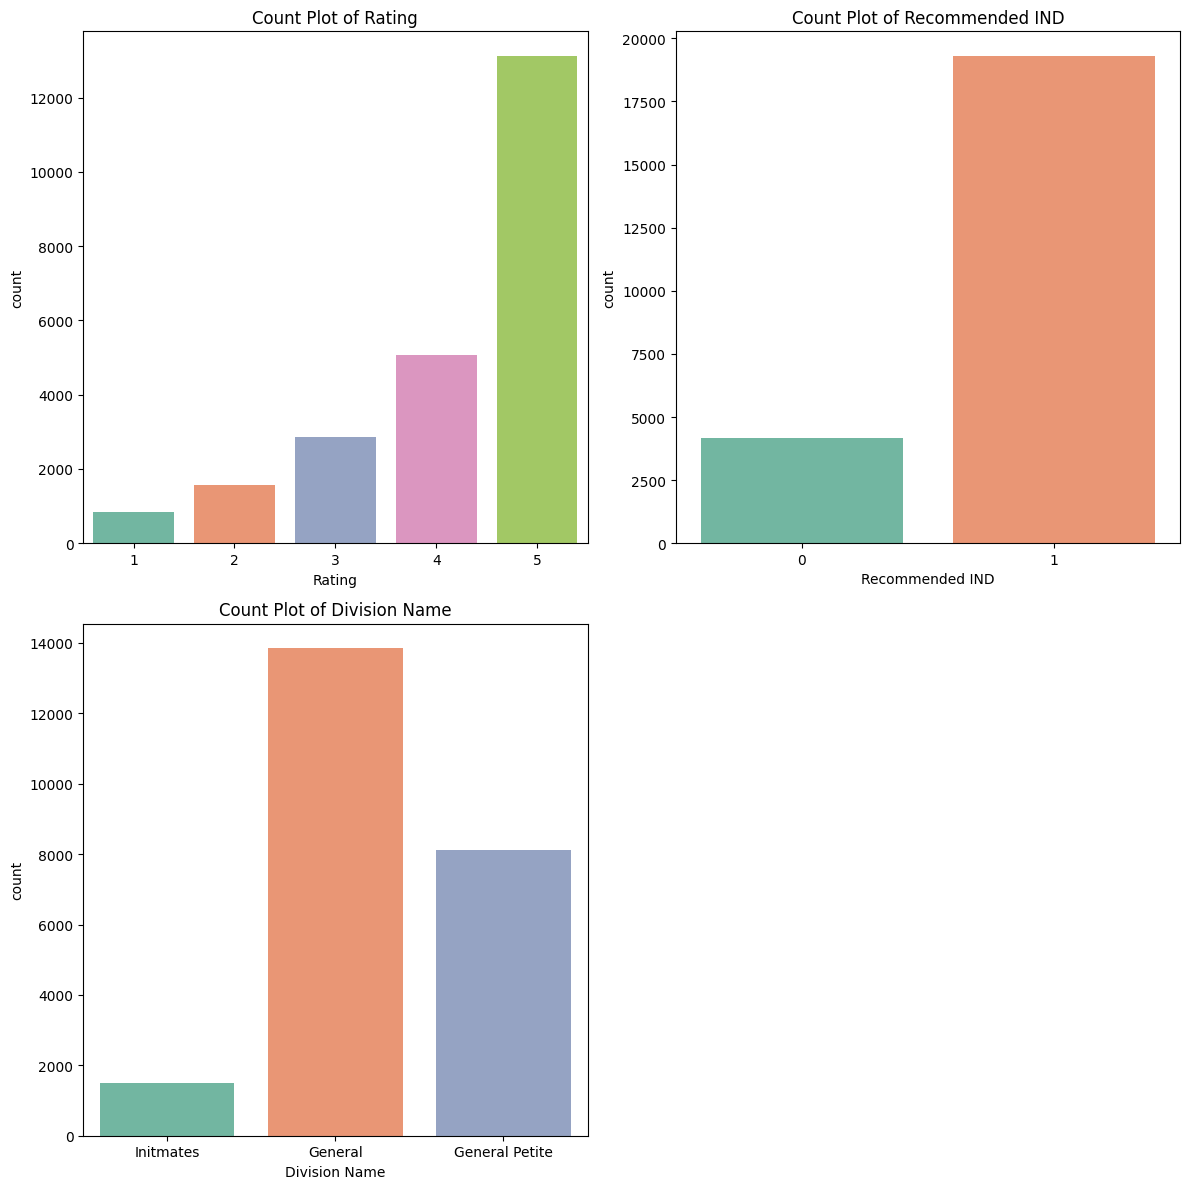

In [ ]:

categorical_cols = ['Rating', 'Recommended IND', 'Division Name']

# Calculate the number of rows needed for subplots
num_rows = (len(categorical_cols) + 1) // 2

# Plot count plots using Seaborn
plt.figure(figsize=(12, 6 * num_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()


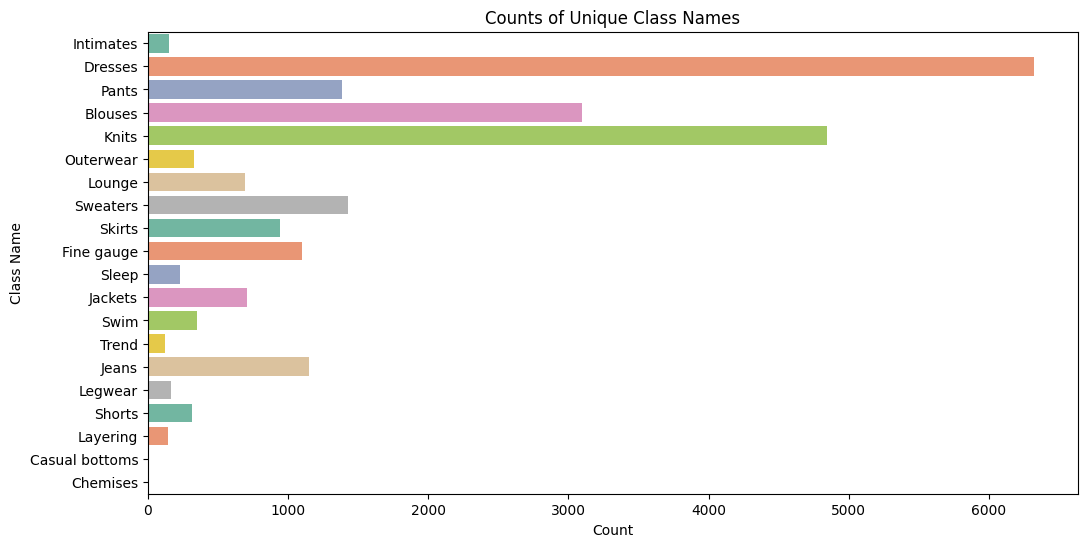

In [ ]:
# Plot a count plot of Class Name
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Class Name', palette='Set2')
plt.xlabel('Count')
plt.ylabel('Class Name')
plt.title('Counts of Unique Class Names')
plt.show()


In [ ]:
###Dresses, Knits, Blouses Pants, Sweater Jeans and Fine Gauge are mostly purchased items.

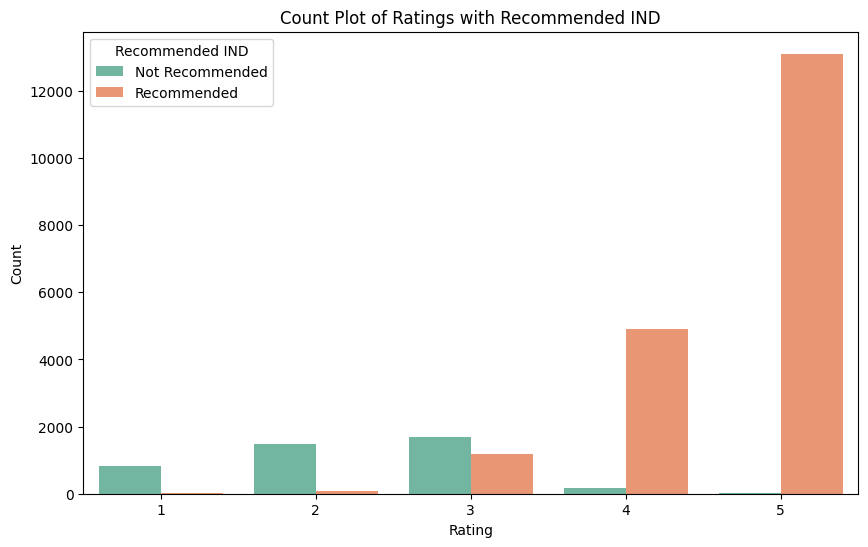

In [ ]:
###Create a count plot with the x-axis representing the "Rating" values and using the "Recommended IND" column as the hue to differentiate between recommended and not recommended products.
##The legend will indicate the categories of the "Recommended IND" column.
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rating', hue='Recommended IND', palette='Set2')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count Plot of Ratings with Recommended IND')
plt.legend(title='Recommended IND', labels=['Not Recommended', 'Recommended'])
plt.show()


In [ ]:
###clearly shows that good rating means product will be recommended

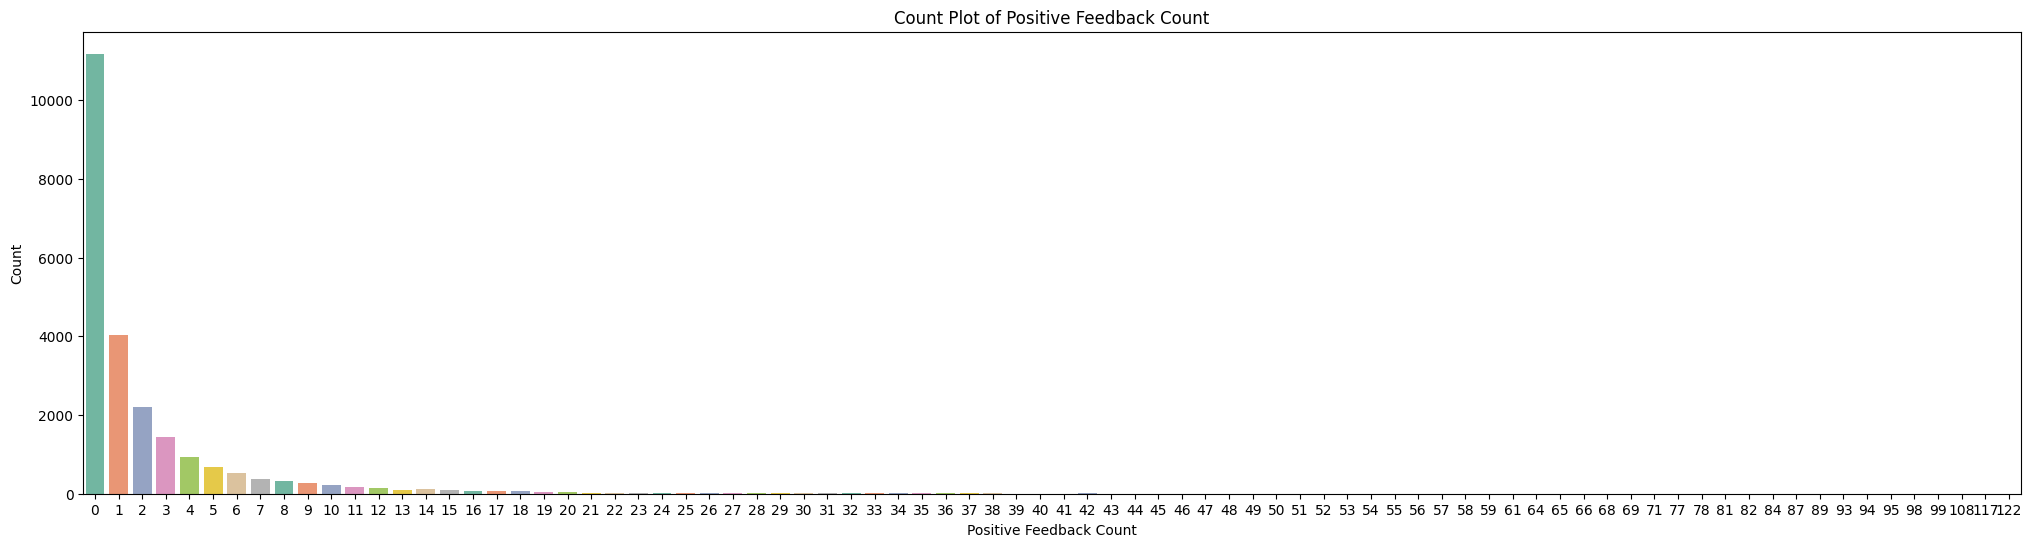

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(data=data, x='Positive Feedback Count', palette='Set2')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Count')
plt.title('Count Plot of Positive Feedback Count')
plt.show()




In [ ]:
# Drop rows with Positive Feedback Count > 20 as from the graph we can see it is only a very small portion of data
drop_positive = data[data['Positive Feedback Count'] > 20].index
data = data.drop(drop_positive, axis=0).reset_index(drop=True)

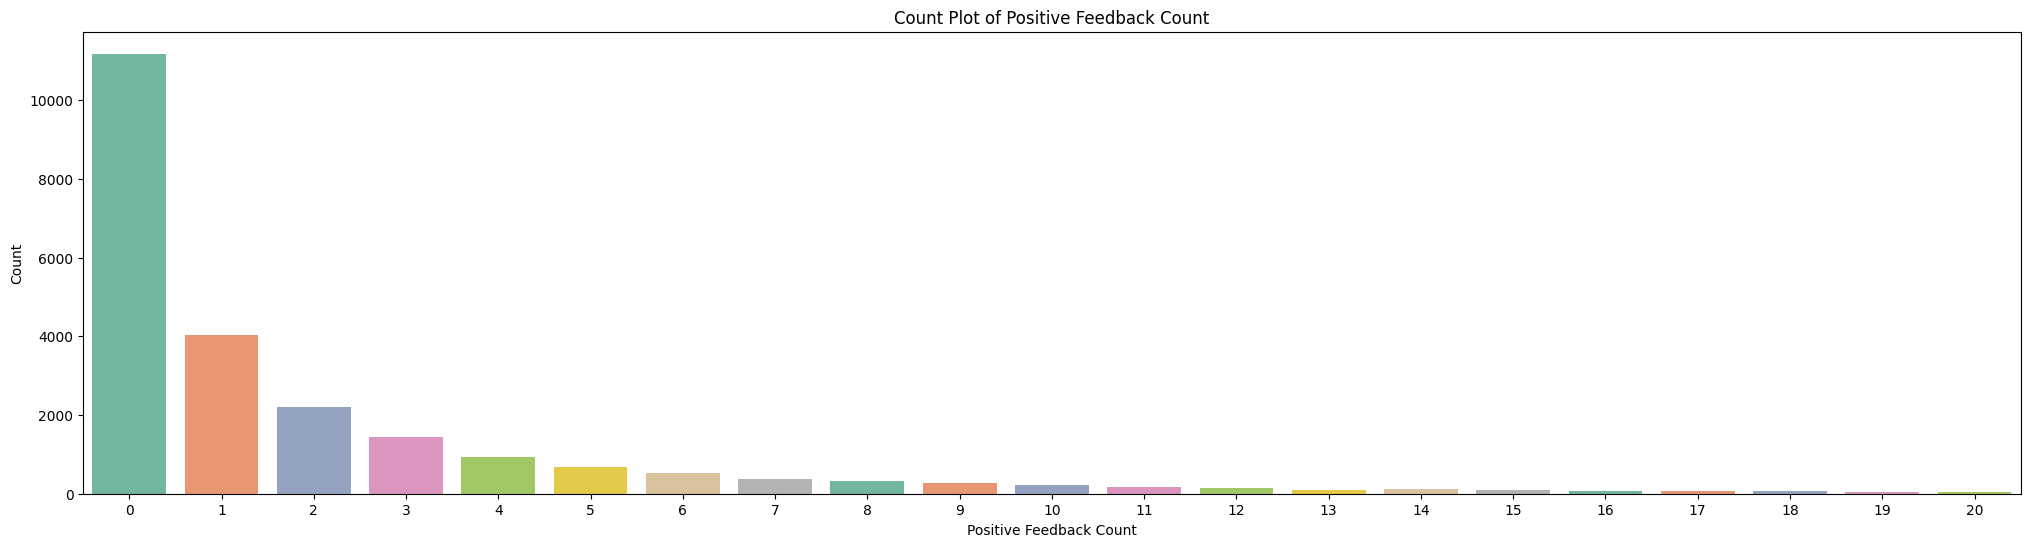

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(data=data, x='Positive Feedback Count', palette='Set2')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Count')
plt.title('Count Plot of Positive Feedback Count')
plt.show()

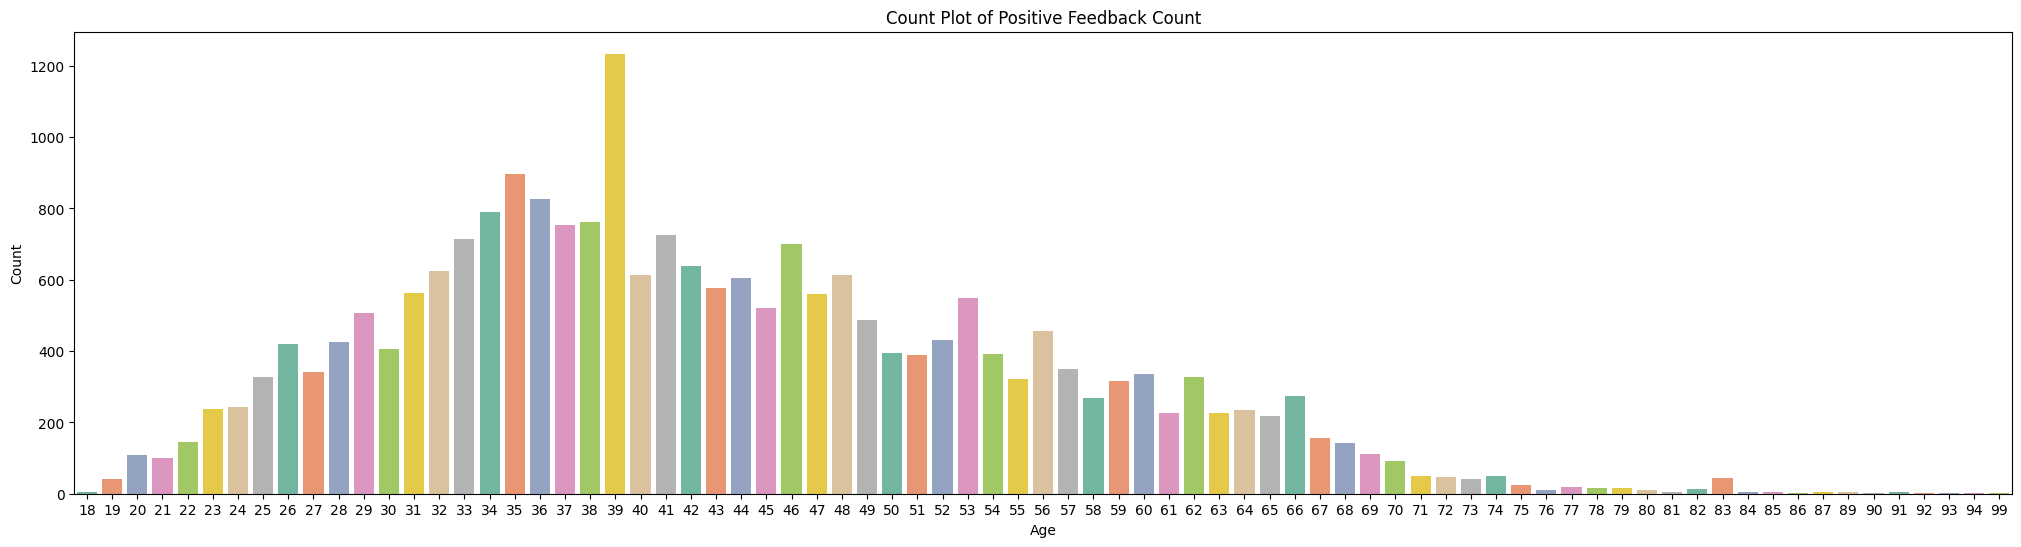

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(data=data, x='Age', palette='Set2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count Plot of Positive Feedback Count')
plt.show()

In [ ]:
###Age 35 to 45 are big buyers

###Because people of this age tends to have more income compared to teens or senior citizens.

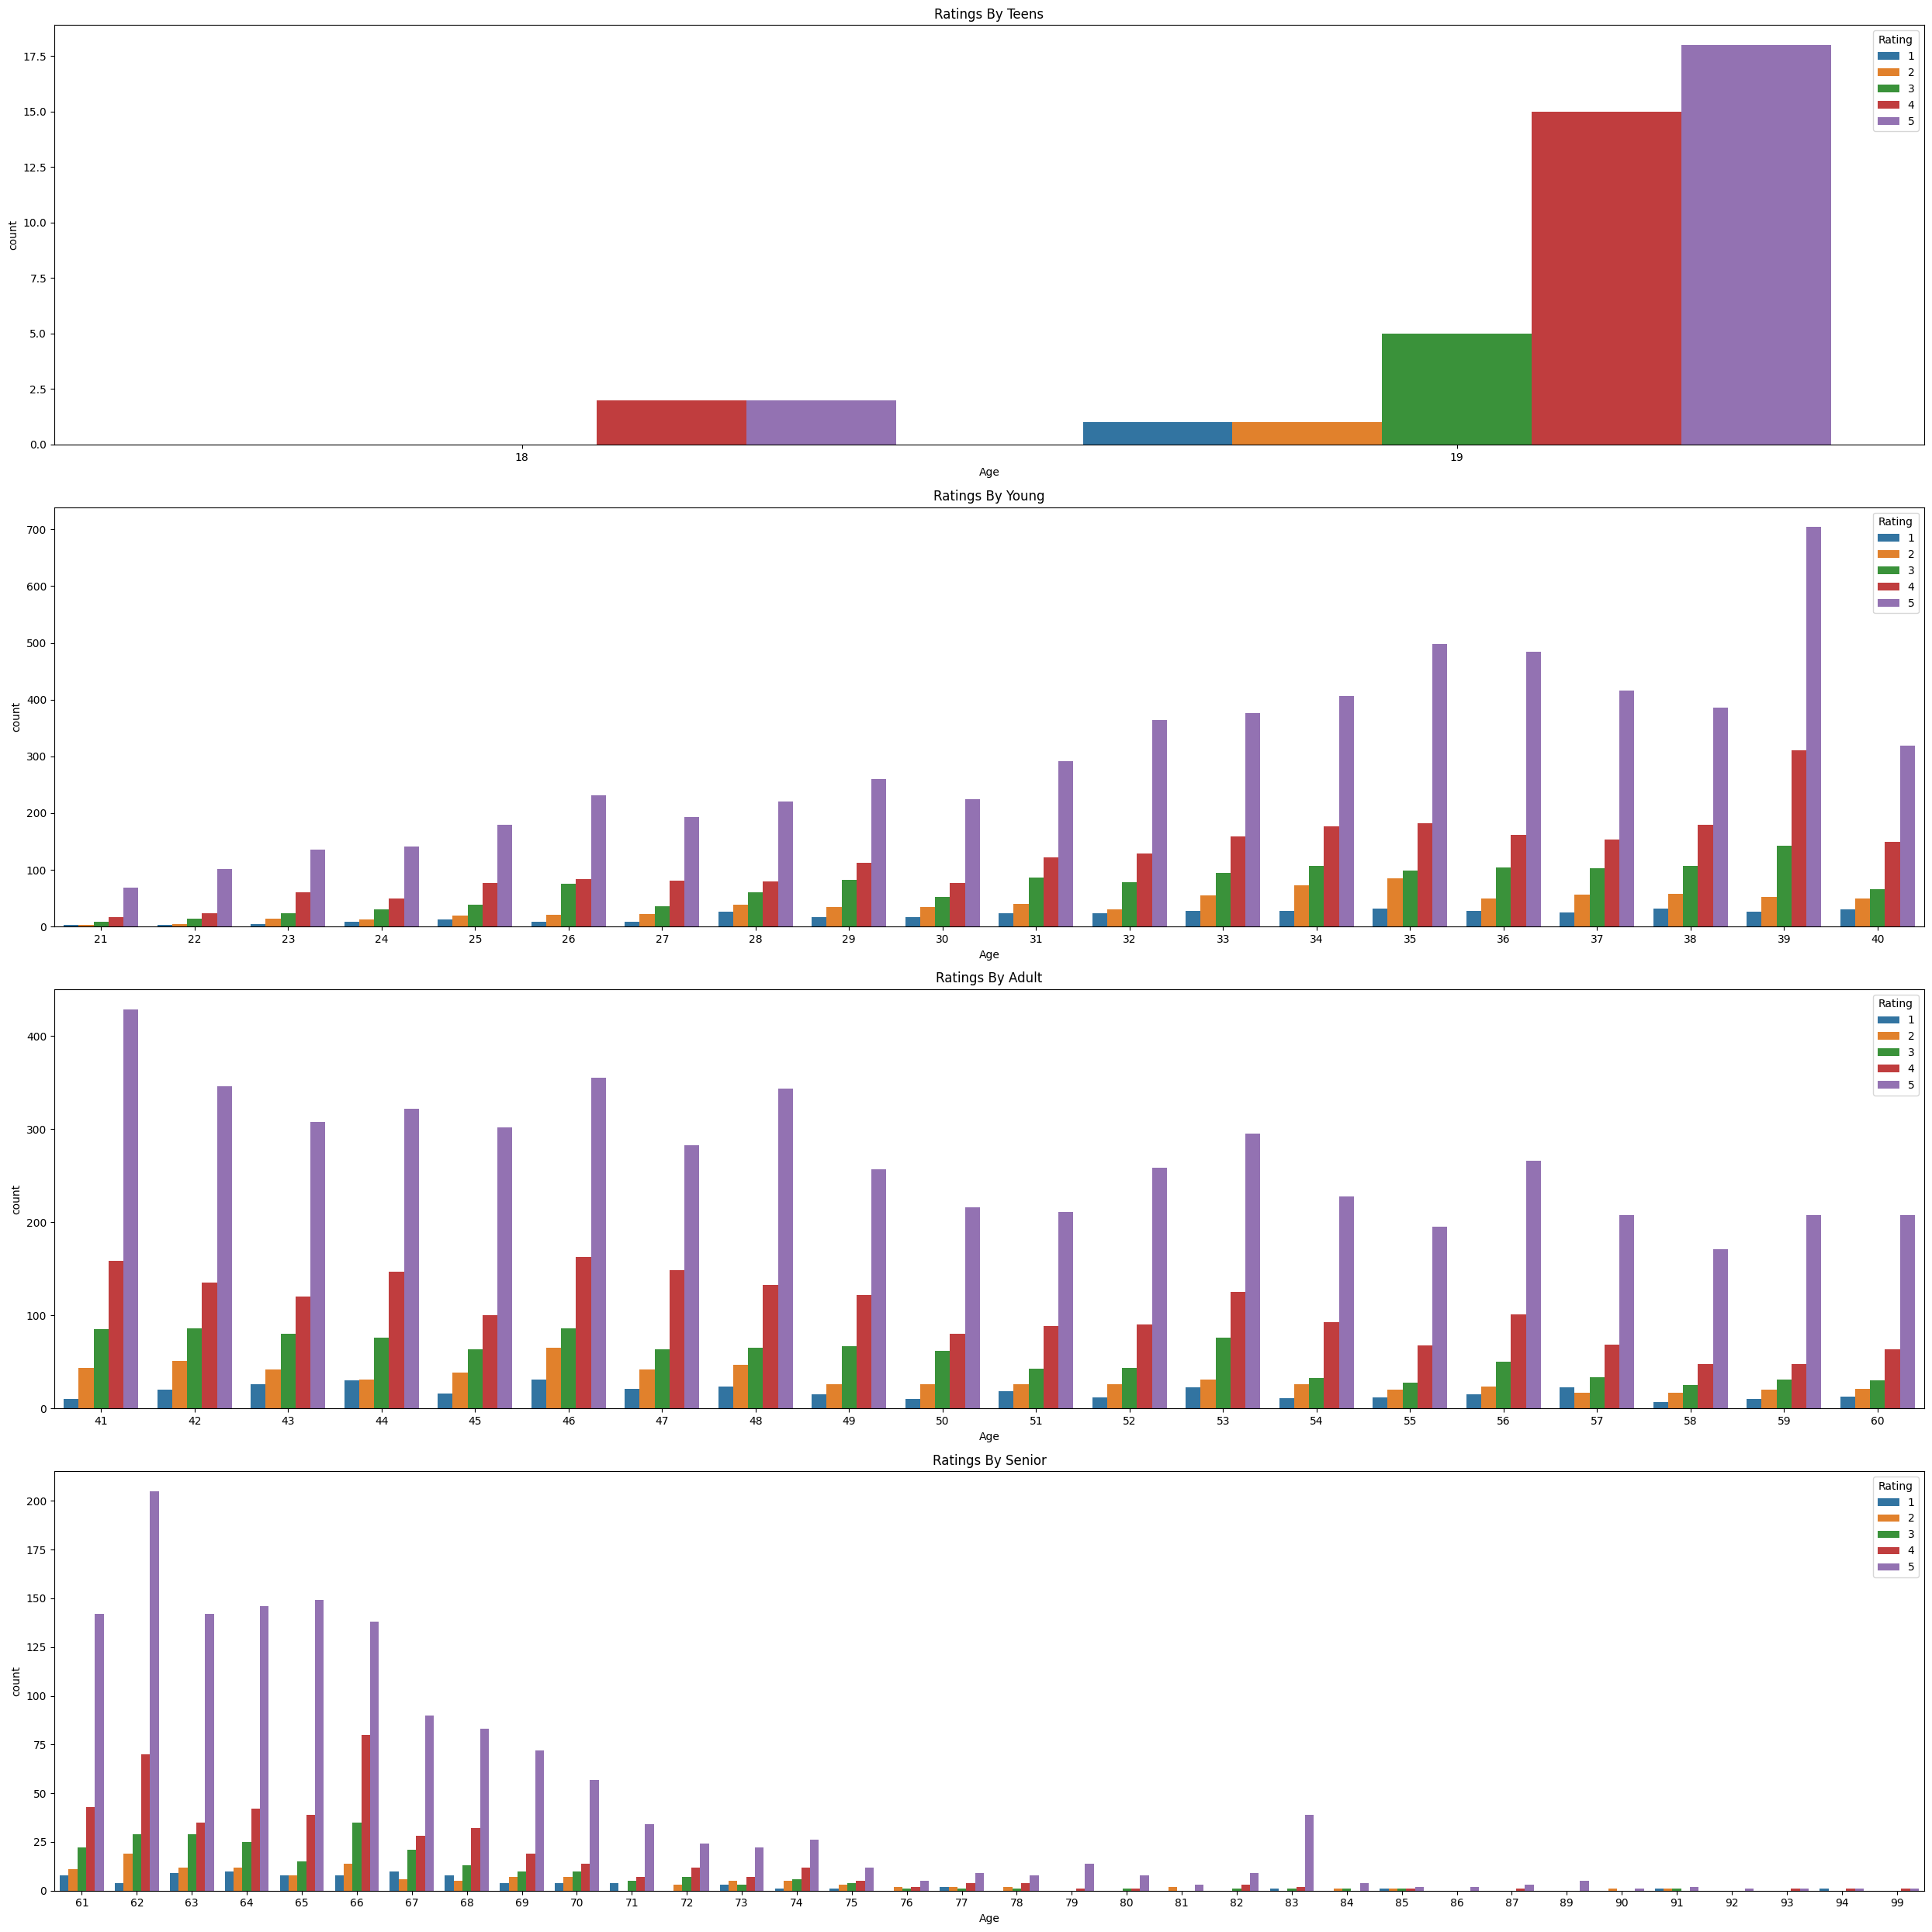

In [ ]:
teens = data[data['Age'] < 20]
youngs= data[(data['Age'] > 20) & (data['Age'] <= 40)]
adult = data[(data['Age'] > 40) & (data['Age'] <= 60)]
senior = data[data['Age'] > 60]

plt.figure(figsize=(25, 25))

plt.subplot(4, 1, 1)
sns.countplot(data=teens, x='Age', hue='Rating')
plt.title('Ratings By Teens')

plt.subplot(4, 1, 2)
sns.countplot(data=youngs, x='Age', hue='Rating')
plt.title('Ratings By Young')

plt.subplot(4, 1, 3)
sns.countplot(data=adult, x='Age', hue='Rating')
plt.title('Ratings By Adult')

plt.subplot(4, 1, 4)
sns.countplot(data=senior, x='Age', hue='Rating')
plt.title('Ratings By Senior')

plt.legend(loc='upper right', title='Rating')
plt.tight_layout()
plt.show()


In [ ]:
###Adult Women are buying more and giving good ratings compared to others.

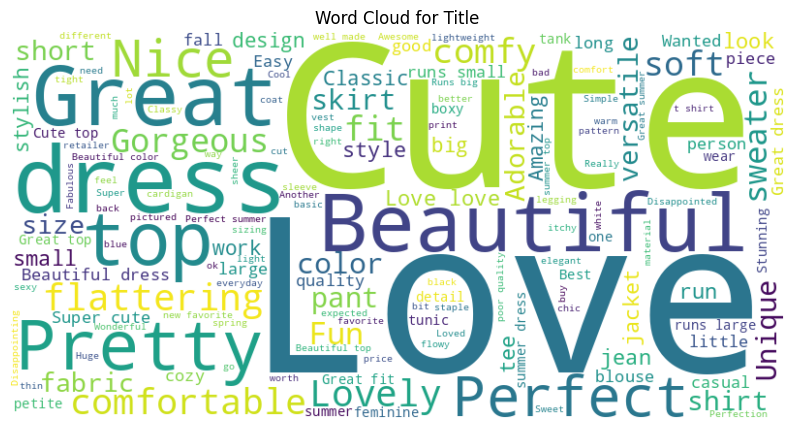

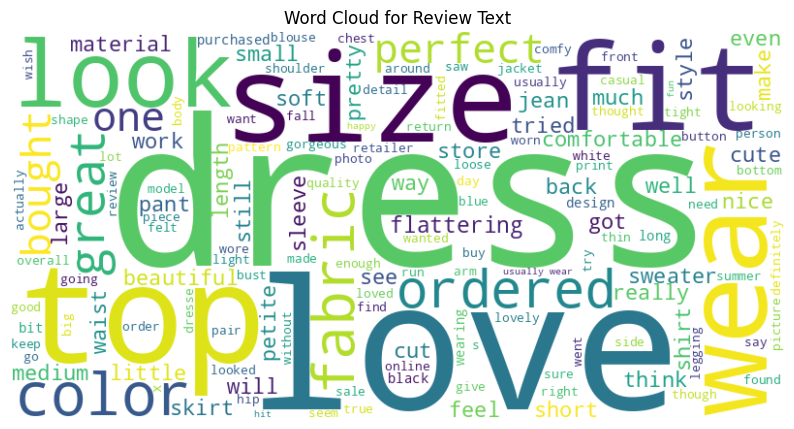

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object for 'Title' column
title_text = ' '.join(data['Title'].dropna())
title_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(title_text)

# Create a WordCloud object for 'Review Text' column
review_text = ' '.join(data['Review Text'].dropna())
review_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(review_text)

# Plot the WordCloud for 'Title' column
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Title')
plt.show()

# Plot the WordCloud for 'Review Text' column
plt.figure(figsize=(10, 6))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()


In [ ]:
##Positive reviews are certainly dominating

In [ ]:
##Histograms

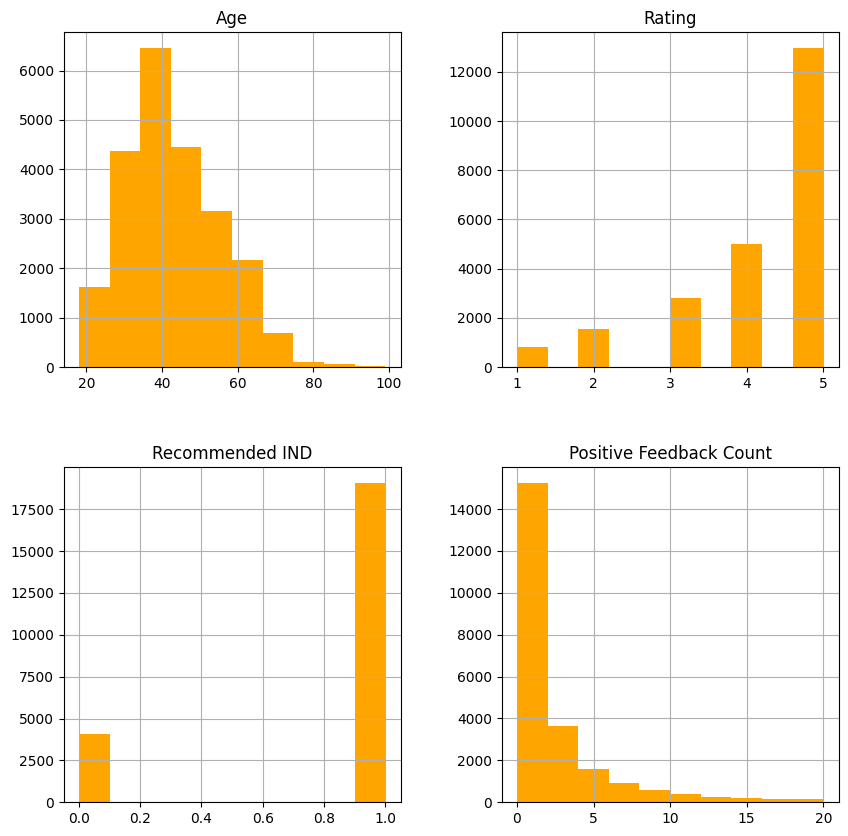

In [ ]:
num_cols = data.select_dtypes(exclude = 'object')
num_cols = num_cols.drop(['Unnamed: 0','Clothing ID'], axis = 1)
num_cols.hist(figsize = (10,10), color = 'orange');

In [ ]:
###Heatmaps

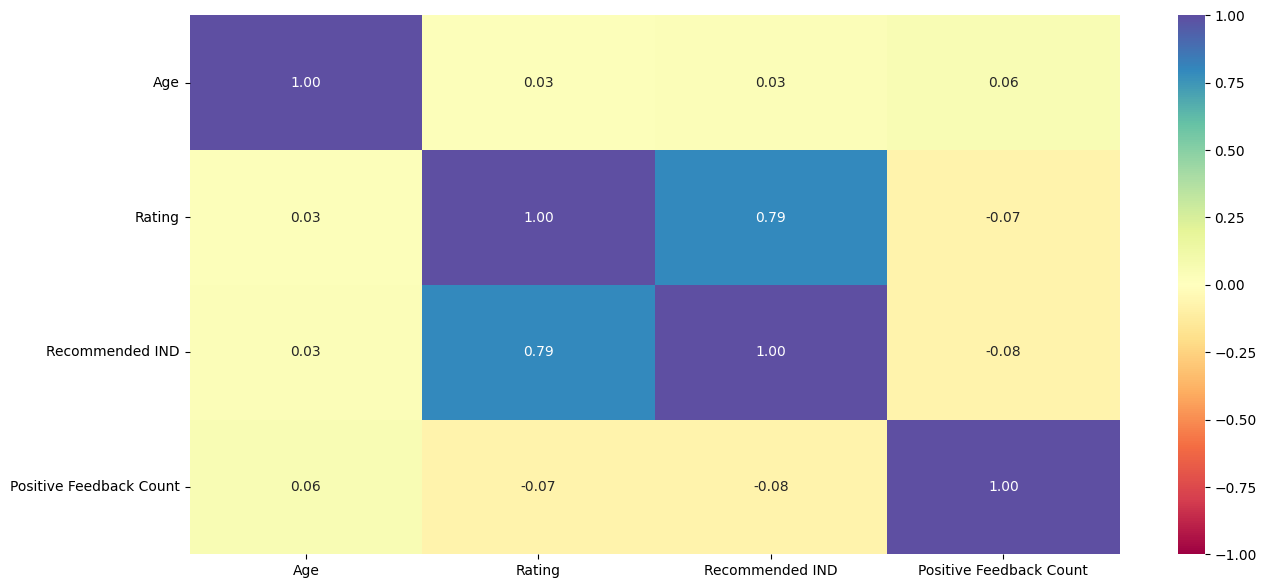

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
###Recommendation and ratings are showing good correlation, i.e, Directly Proportional to each other.

In [ ]:
###Clustering Analysis

In [ ]:
new_df = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]

In [ ]:
new_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


In [ ]:
###LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
le = LabelEncoder()
for col in new_df.iloc[:,4 : ].columns:
    new_df[col] = le.fit_transform(new_df[col])

In [ ]:
##DATA SCALING
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = pd.DataFrame(scaler.transform(new_df), columns = new_df.columns, index = new_df.index)
scaled_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,-0.827983,-0.181309,0.461961,-0.588843,2.464575,-0.221002,-0.376582
1,-0.746598,0.721561,0.461961,0.585005,-0.770539,-0.832658,-0.759370
2,1.369419,-1.084178,-2.164687,-0.588843,-0.770539,-0.832658,-0.759370
3,0.555566,0.721561,0.461961,-0.588843,0.847018,-1.444313,1.154573
4,0.311411,0.721561,0.461961,1.171930,-0.770539,1.002309,-1.333553


In [ ]:
###We will perform K-means clustering

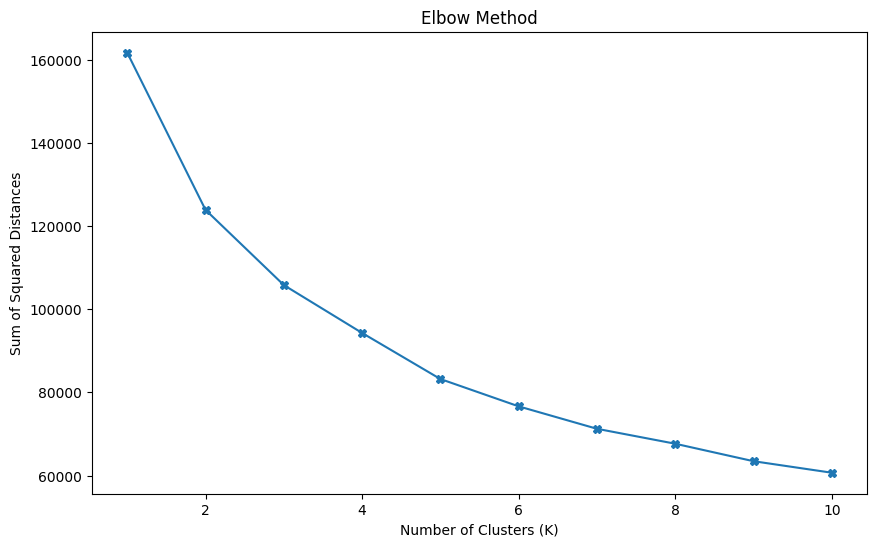

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list to store the errors for different values of K
errors = []

# Calculate the sum of squared distances for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    errors.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), errors, marker='X')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [ ]:
###K=5

In [ ]:
model = KMeans(n_clusters = 5, random_state = 1)
model.fit_predict(scaled_df)

array([0, 4, 2, ..., 3, 2, 4], dtype=int32)

In [ ]:
##Adding labels to dataset

In [ ]:
scaled_df['Labels'] = model.labels_
new_df['Labels'] = model.labels_
new_df.sample(5)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Labels
15670,41,5,1,0,0,1,3,4
6054,22,5,1,1,0,4,0,3
21856,52,5,1,0,0,3,12,3
20865,51,4,0,0,0,1,3,2
12534,27,5,1,1,2,2,10,0


In [ ]:
new_df.Labels.value_counts()

3    8183
4    6879
2    3829
0    2658
1    1547
Name: Labels, dtype: int64

In [ ]:
###CLUSTER ANALYSIS

In [ ]:
new_df2 = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]

In [ ]:
new_df2['Labels'] = new_df['Labels']
new_df2.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Labels
0,33,4,1,0,Initmates,Intimate,Intimates,0
1,34,5,1,4,General,Dresses,Dresses,4
2,60,3,0,0,General,Dresses,Dresses,2
3,50,5,1,0,General Petite,Bottoms,Pants,0
4,47,5,1,6,General,Tops,Blouses,3


In [ ]:
new_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23096.0,43.173623,12.287506,18.0,34.0,41.0,52.0,99.0
Rating,23096.0,4.200814,1.107604,1.0,4.0,5.0,5.0,5.0
Recommended IND,23096.0,0.824125,0.380722,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23096.0,2.006538,3.407669,0.0,0.0,1.0,2.0,20.0
Labels,23096.0,2.652840,1.283305,0.0,2.0,3.0,4.0,4.0


In [ ]:
cluster_means = new_df2.groupby('Labels').mean().reset_index()
cluster_means.style.highlight_max(color="lightgreen", axis=0)

,Labels,Age,Rating,Recommended IND,Positive Feedback Count
0,0,42.574868,4.626411,0.982694,1.240783
1,1,45.712346,4.308339,0.877828,11.996768
2,2,42.331157,2.265343,0.003656,1.956647
3,3,44.075645,4.606868,0.999267,1.073201
4,4,42.229975,4.606484,0.999128,1.193778


In [ ]:
cluster_means.style.highlight_min(color="red", axis=0)

,Labels,Age,Rating,Recommended IND,Positive Feedback Count
0,0,42.574868,4.626411,0.982694,1.240783
1,1,45.712346,4.308339,0.877828,11.996768
2,2,42.331157,2.265343,0.003656,1.956647
3,3,44.075645,4.606868,0.999267,1.073201
4,4,42.229975,4.606484,0.999128,1.193778


Cluster 0,3 and 4 giving best ratings as well as recommending products

Cluster 2 consists of women giving least ratings and least recommendation but Positive feedback Count is comparitively higher

Cluster 1 is women with satisfactory ratings and Recommendations.

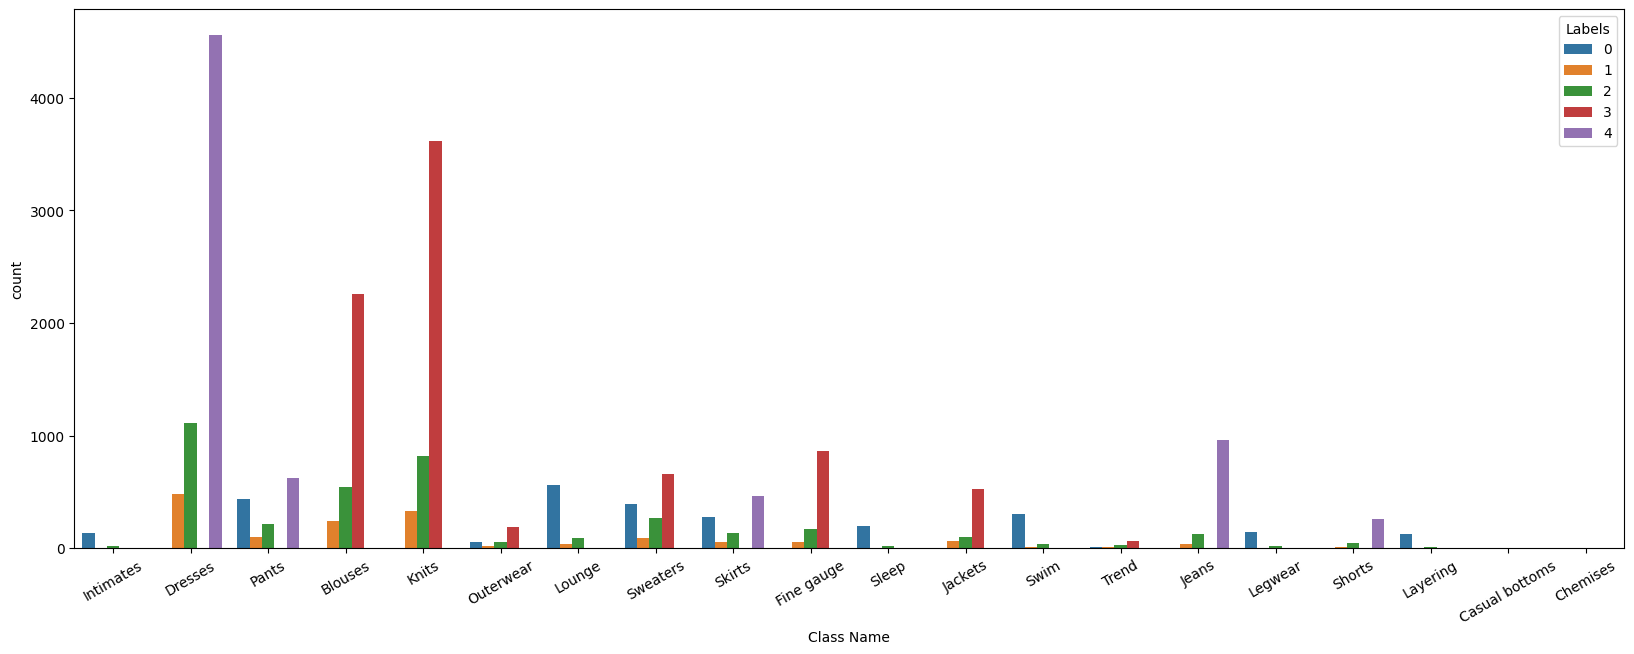

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(x = new_df2['Class Name'], hue = new_df2['Labels'])
plt.xticks(rotation = 30)
plt.legend(loc = 'upper right', title = "Labels")
plt.show()

Women in cluster 0 and 1 shows average interest in purchase.
Women in cluster 2 purchase Dresses, Knits, Blouses, Pants and Sweaters mainly
Women in cluster 3 purchases mainly Knits, Blouses, Fine Guage, Jackets, Sweaters.
Women in cluster4 purchase Dresses, Jeans, Skirts and Shorts.


---



---





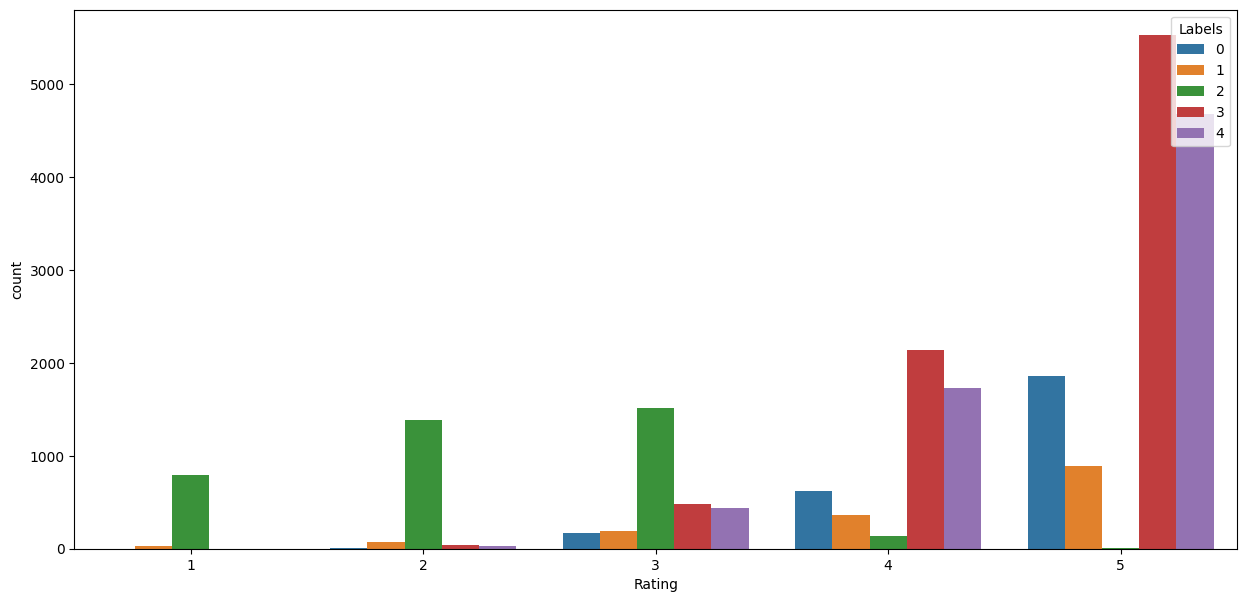

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = new_df2['Rating'], hue = new_df2['Labels'])
plt.legend(loc = 'upper right', title = "Labels")
plt.show()

Women in cluster 3 & 4 tend to give more positive feedback. Cluster 2 gives average and below average feedbacks and 0 and 1 clusters give average feedbacks.

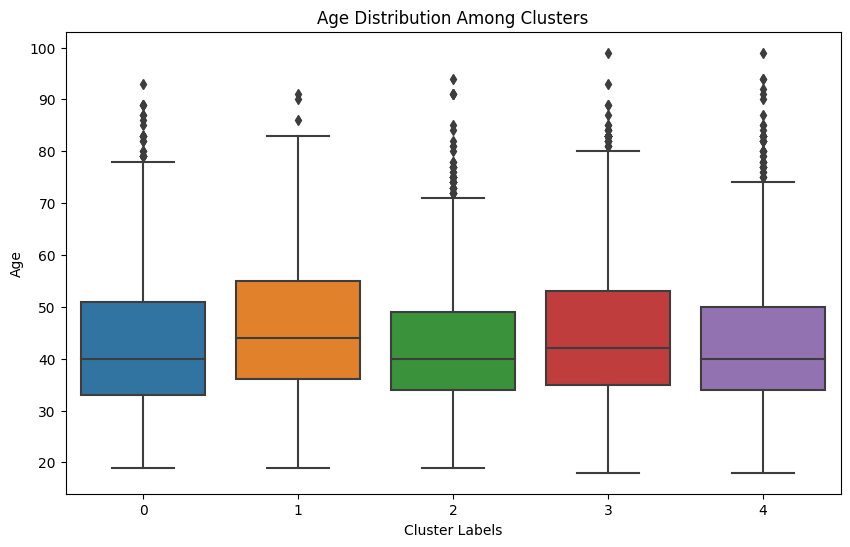

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df2, x='Labels', y='Age')
plt.xlabel('Cluster Labels')
plt.ylabel('Age')
plt.title('Age Distribution Among Clusters')
plt.show()


AGE 35-52 IS MAJORITY IN CLUSTER0.  IN CLUSTER1 AGES 38-55 IS MAJORITY. CLUSTER2 AGES 35-50 IS MAJORITY. CLUSTER 3 AGES 38-50 IS MAJORITY. CLUSTER 4 35-45 IS MAJORITY

In [ ]:
###FINDINGS


Let's break down the analysis for each cluster :

Cluster 0:
- Women in Cluster 0 tend to give the best ratings and recommendations for products.
- They show average interest in purchases across different product classes.
- The majority of women in Cluster 0 are aged between 35 and 52.

Cluster 1:
- Women in Cluster 1 give satisfactory ratings and recommendations.
- They also show average interest in purchases across different product classes.
- The majority of women in Cluster 1 are aged between 38 and 55.

Cluster 2:
- Women in Cluster 2 give relatively lower ratings and recommendations.
- They purchase Dresses, Knits, Blouses, Pants, and Sweaters the most.
- Although they give lower ratings, they provide a higher count of positive feedback.
- The age range of women in Cluster 2 is mainly between 35 and 50.

Cluster 3:
- Women in Cluster 3 give very positive ratings and recommendations.
- They predominantly purchase Knits, Blouses, Fine Gauge, Jackets, and Sweaters.
- They also provide more positive feedback.
- The majority of women in Cluster 3 are aged between 38 and 50.

Cluster 4:
- Women in Cluster 4 give excellent ratings and recommendations.
- They primarily purchase Dresses, Jeans, Skirts, and Shorts.
- They provide more positive feedback through higher ratings.
- The age range of women in Cluster 4 is mainly between 35 and 45.

In summary, each cluster has its own unique characteristics in terms of ratings, recommendations, product preferences, feedback, and age distribution.

